<a href="https://colab.research.google.com/github/ScarletBird/google_play_store-sentiment_analysis_document_classification/blob/main/Google_play_store_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this project, the Google Apps reviews dataset was chosen to analyse whether the client made a good review, a neutral review or a bad review (Sentiment Analysis).
For the second part, the app will be classified according to what was said about it (Document Classification)

In [1]:
# Importing nltk and pandas
import nltk
import pandas as pd

# Used for Lemmatisation mostly, but the download will be made here
# to avoid polluting the code
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

After importing the libraries that will be used, the dataset will be imported. This dataset can be found in: https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore_user_reviews.csv

In [2]:
data = pd.read_csv('googleplaystore_user_reviews.csv')

# Visualization of the first data
print("Dataset size: {0}".format(data.size))
data.head()

Dataset size: 321475


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In this dataset there are some NaN value, which will be expurged so only data with values will be worked on.

In [3]:
# Dropna from pandas will eliminate NaN
data = data.dropna(axis=0, subset=["Translated_Review"])

print("Dataset size without NaN: {0}".format(data.size))
data.head()

Dataset size without NaN: 187135


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In the original dataset, we already have the feelings, the polarity and the subjectivity of each review, but since the algorithm will classify the sentiment only, it will be cast aside.

0    I like eat delicious food. That's I'm cooking ...
1      This help eating healthy exercise regular basis
3           Works great especially going grocery store
4                                         Best idea us
5                                             Best way
Name: Translated_Review, dtype: object

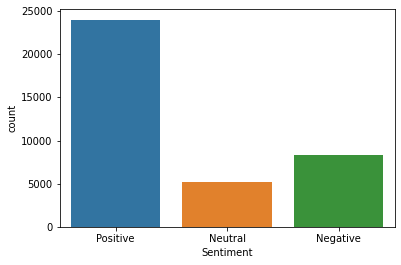

In [4]:
import seaborn as sns

# From-to of the sentiments: 1 is positive, 0 is neutral and -1 is negative
def sentimentToInt(word):
  if word == 'Positive': return 1
  elif word == 'Negative': return -1
  else: return 0

# Dataset is divided for each case
X = data.Translated_Review
y = data.Sentiment.apply(sentimentToInt)

# Visualization of sentiment in general
sns.countplot(x=data.Sentiment)

X.head()

Splitting data for train and test

In [5]:
from sklearn.model_selection import train_test_split

# The split is made without random state, so the results are preseverd
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)

print(train_X)

63423    Honestly waste time. I always saw ads YouTube ...
26985    This game favorite time. 5/5, problem I I'm 2v...
11129    I love able school pain buttox pay,I money pay...
35202                                            Love game
14584    I used love app.. simple easy use, always I wa...
                               ...                        
35616    I dont like updated version much ads, takes lo...
54887                                                 Cool
52297    game time always helped tickets even messed go...
36137    My kids love much keep asking visit places hah...
4284     This sux saves cloud. Unless im missing someth...
Name: Translated_Review, Length: 28070, dtype: object


After splitting the dataset, a Counting matrice is made so we can use it for training.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer

# Tweets tokenizer is used, to keep smiles and ponctuation, which may affect sentiment analysis
tknzr = TweetTokenizer(preserve_case=False, reduce_len=True)

# Tokens that are in at least 10 reviews
counter_vectorizer = CountVectorizer(tokenizer=tknzr.tokenize, stop_words='english', min_df=10)

counts = counter_vectorizer.fit_transform(train_X)

After treatment, the data is trained using Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Training using Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(counts, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

The Confusion Matrix and Classification Report will be used for a better visualization of the results, both provided by Sklearn. A pipeline is also created so the data can be easily processed.

              precision    recall  f1-score   support

          -1       0.93      0.74      0.83      2098
           0       0.82      0.80      0.81      1307
           1       0.89      0.96      0.92      5952

    accuracy                           0.89      9357
   macro avg       0.88      0.83      0.85      9357
weighted avg       0.89      0.89      0.88      9357



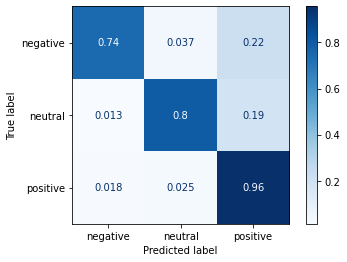

In [8]:
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, classification_report

# Pipeline creation
pipeline_data = Pipeline([
    ('vect', counter_vectorizer),
    ('clf', rfc)
])

# Confusion Matrix for graphic visual
plot_confusion_matrix(pipeline_data, test_X, test_y,
                                 display_labels=['negative','neutral','positive'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

# Classification Report for numeric visual
print(classification_report(test_y, pipeline_data.predict(test_X),zero_division=0))

It is possible to see by the results that the positive label has the highest recall. Besides, it also has the second highest predicted on the other labels. This is possibly because positive reviews are the most frequent sentiment, as seen before, causing fewer words reviews to be classified as positive, for example.

For the next case, the Document Classification will be made, now using the App name and the reviews. First the Lemmatisation will be made to better classify each case.

In [9]:
# Lemmatisation imports
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

# Upgrading lemmatisation imports
from nltk.corpus import wordnet as wn
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

# Defining variables to be used
lemmatizer = WordNetLemmatizer()

# Only words will be used, leaving ponctuation in general aside
tknz = RegexpTokenizer(r'[a-zA-Z]+') 
stopwords = nltk.corpus.stopwords.words('english')

# Here, in order to make the lemmatisation more effective, an additional 
# function is made, bringing verbs, adverbs and adjectives to their lemma
# (making verbs in -ing and past forms become the same)
def lemmatizeImproved(words):
  lem_arr = []
  for token, tag in pos_tag(words):
    lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])
    lem_arr.append(lemma)
  return lem_arr

# Function to remove stopwords from the list
def notStopWord(words): 
  noStop = []
  for w in words:
    if w not in stopwords: noStop.append(w)
  return noStop

# Applying functions to clean the dataset
X_lem = X.apply(lambda x: tknz.tokenize(str(x).lower()))
X_lem = X_lem.apply(lambda x: lemmatizeImproved(x))
X_lem = X_lem.apply(lambda x: notStopWord(x))

X_lem.head()

0    [like, eat, delicious, food, cook, food, case,...
1       [help, eat, healthy, exercise, regular, basis]
3        [work, great, especially, go, grocery, store]
4                                      [best, idea, u]
5                                          [best, way]
Name: Translated_Review, dtype: object

After lemmatisation, the unique values of Apps will become numbers, allowing them to be categorized.

[0 0 0 0 0]
37427


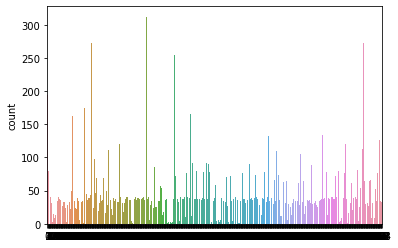

In [10]:
# Division of the apps to use the Document Classification as categories
y_class = pd.Categorical(data.App)

# Capture of unique values
y_codes = y_class.codes

# Visualization of how the categories are in general
sns.countplot(x=y_codes)

print(y_codes[:5])
print(y_codes.size)

Now the classficiation can be done, dividing the datasets for training and test.

In [11]:
# Reusing the Sentiment Analysis code, but with y_codes
train_X, test_X, train_y, test_y = train_test_split(X_lem, y_codes, random_state=0)

# Diving texts in TF IDF for classification
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_classifier_train = vectorizer.fit_transform(train_X.apply(lambda w: ' '.join(w)))
tfidf_classifier_test = vectorizer.transform(test_X.apply(lambda w: ' '.join(w)))

With the datasets ready, SVM will be used to classify the texts.

In [12]:
# Importing SVM method
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SVM = LinearSVC()

# Training and classifications using the datasets
SVM.fit(tfidf_classifier_train.todense(),train_y)
predictions = SVM.predict(tfidf_classifier_test.todense())

print("The mean accuracy of the SVM: {0:.2f}%".format(accuracy_score(test_y,predictions)*100))

The mean accuracy of the SVM: 43.36%


The result of the accuracy was very low, a few reasons could be:
*   Even with many reviews, we can see by the graph that the distribution is far from being even, creating a tendency for the classifier;
*   There are no guarantees that the apps do not have the same subjects, so it is possible to have, for example, two (or more) apps for cooking, which will result in similar reviews, making the classifier lose precision;
*   The reviews words are not restricted to the apps, making it possible to have generic reviews for distinct apps ("nice app" is a possible review that is impossible to be classified).